### Pre-requisites:
#### 1. Install R

Install R with Homebrew on macOS:

```bash
brew install r
```

### 2. Install brew deps

```bash
brew install harfbuzz fribidi libtiff
```

#### 3. Install R kernel for Jupyter
Open up an R session with `R` and run the following commands:

```r
install.packages('IRkernel')
IRkernel::installspec(sys_prefix = TRUE)
```

For helpful shortcuts, run this in a terminal:

```bash
poetry run jupyter labextension install @techrah/text-shortcuts
```

#### 4. Make sure you choose the R kernel when you open a new notebook

#### 5. Install the R packages we need (best to run this in an R terminal instead of the notebook)

```r
install.packages('ecm')
install.packages('tidyverse')
```


# Building an ECM Model Using R and the `ecm` Package in a Jupyter Notebook

## Step 1: Load the Required Libraries

We will start by loading the necessary libraries that we will use in this notebook. Here, we will use the `ecm` package to build the ECM model.


In [5]:
library(ecm)
library(tidyverse)
library(broom)

## Step 2: Load the Data

Next, we will load the data that we will use to build the ECM model. For this example, we will use ecm to predict Wilshire 5000 index based on corporate profits, Federal Reserve funds rate, and unemployment rate

In [6]:
# Load the data
data(Wilshire)
# Use 2015-12-01 and earlier data to build models
trn <- Wilshire[Wilshire$date<='2015-12-01',]

## Step 3: Build the ECM Model

Now, we will build the ECM model using the `ecm` package.

In [13]:
# Assume all predictors are needed in the equilibrium and transient terms of ecm.
xeq <- xtr <- trn[c('CorpProfits', 'FedFundsRate', 'UnempRate')]
model <- ecm(trn$Wilshire5000, xeq, xtr, includeIntercept=TRUE)

summary(model)


Call:
lm(formula = dy ~ ., data = x, weights = weights)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9223 -0.6088  0.0210  0.6822  3.9381 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.4160213  0.8236705  -0.505 0.614155    
deltaCorpProfits   0.0119853  0.0020332   5.895 1.97e-08 ***
deltaFedFundsRate -0.1231619  0.1547487  -0.796 0.427210    
deltaUnempRate    -1.4841457  0.4389805  -3.381 0.000896 ***
CorpProfitsLag1    0.0027077  0.0008258   3.279 0.001265 ** 
FedFundsRateLag1   0.0655636  0.0494706   1.325 0.186849    
UnempRateLag1     -0.0532751  0.1040916  -0.512 0.609448    
yLag1             -0.0337028  0.0192679  -1.749 0.082066 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.711 on 170 degrees of freedom
Multiple R-squared:  0.2919,	Adjusted R-squared:  0.2628 
F-statistic: 10.01 on 7 and 170 DF,  p-value: 1.885e-10


In [9]:
summary(model)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.416021303,0.8236705332,-0.5050822,6.141553e-01
deltaCorpProfits,0.011985337,0.0020331815,5.8948684,1.967203e-08
deltaFedFundsRate,-0.123161905,0.1547486740,-0.7958834,4.272097e-01
deltaUnempRate,-1.484145702,0.4389804803,-3.3808922,8.963744e-04
CorpProfitsLag1,0.002707652,0.0008258208,3.2787405,1.264620e-03
FedFundsRateLag1,0.065563613,0.0494706252,1.3253039,1.868488e-01
UnempRateLag1,-0.053275111,0.1040916078,-0.5118099,6.094483e-01
yLag1,-0.033702816,0.0192678856,-1.7491704,8.206627e-02


In [10]:
tidy(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.416021303,0.8236705332,-0.5050822,6.141553e-01
deltaCorpProfits,0.011985337,0.0020331815,5.8948684,1.967203e-08
deltaFedFundsRate,-0.123161905,0.1547486740,-0.7958834,4.272097e-01
deltaUnempRate,-1.484145702,0.4389804803,-3.3808922,8.963744e-04
CorpProfitsLag1,0.002707652,0.0008258208,3.2787405,1.264620e-03
FedFundsRateLag1,0.065563613,0.0494706252,1.3253039,1.868488e-01
UnempRateLag1,-0.053275111,0.1040916078,-0.5118099,6.094483e-01
yLag1,-0.033702816,0.0192678856,-1.7491704,8.206627e-02


In [11]:
augment(model)

.rownames,dy,deltaCorpProfits,deltaFedFundsRate,deltaUnempRate,CorpProfitsLag1,FedFundsRateLag1,UnempRateLag1,yLag1,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,-0.023333333,4.012,0.91000000,0.13333333,59.168,4.563333,5.900000,1.1366667,-0.57113659,0.547803260,0.03187620,1.715996,4.355351e-04,0.325303481
3,0.000000000,2.183,-0.72333333,-0.10000000,63.180,5.473333,6.033333,1.1133333,0.01861637,-0.018616373,0.02630850,1.716530,4.104050e-07,-0.011023359
4,0.126666667,4.194,-1.21000000,-0.16666667,65.363,4.750000,5.933333,1.1133333,0.16541470,-0.038748030,0.04373625,1.716528,3.064464e-06,-0.023152097
5,0.040000000,1.068,0.76000000,-0.06666667,69.557,3.540000,5.766667,1.2400000,-0.32646091,0.366460908,0.03239911,1.716291,1.983193e-04,0.217675258
6,0.013333333,3.195,0.44000000,-0.13333333,70.625,4.300000,5.700000,1.2800000,-0.10768956,0.121022892,0.02589737,1.716505,1.705888e-05,0.071646457
7,0.063333333,6.352,0.40333333,-0.20000000,73.820,4.740000,5.566667,1.2933333,0.07776005,-0.014426717,0.02493668,1.716530,2.329577e-07,-0.008536516
8,-0.050000000,11.655,1.39333333,-0.43333333,80.172,5.143333,5.366667,1.3566667,0.41785218,-0.467852181,0.03340700,1.716140,3.339924e-04,-0.278045827
9,-0.110000000,3.034,1.28000000,0.00000000,91.827,6.536667,4.933333,1.3066667,-0.16696419,0.056964192,0.02937780,1.716525,4.318091e-06,0.033783635
10,0.046666667,1.692,2.74333333,-0.13333333,94.861,7.816667,4.933333,1.1966667,-0.06954559,0.116212259,0.06337658,1.716506,4.163627e-05,0.070161519


In [12]:
glance(model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.2919125,0.262756,1.711475,10.0119,1.885342e-10,7,-344.1276,706.2553,734.8913,497.9547,170,178


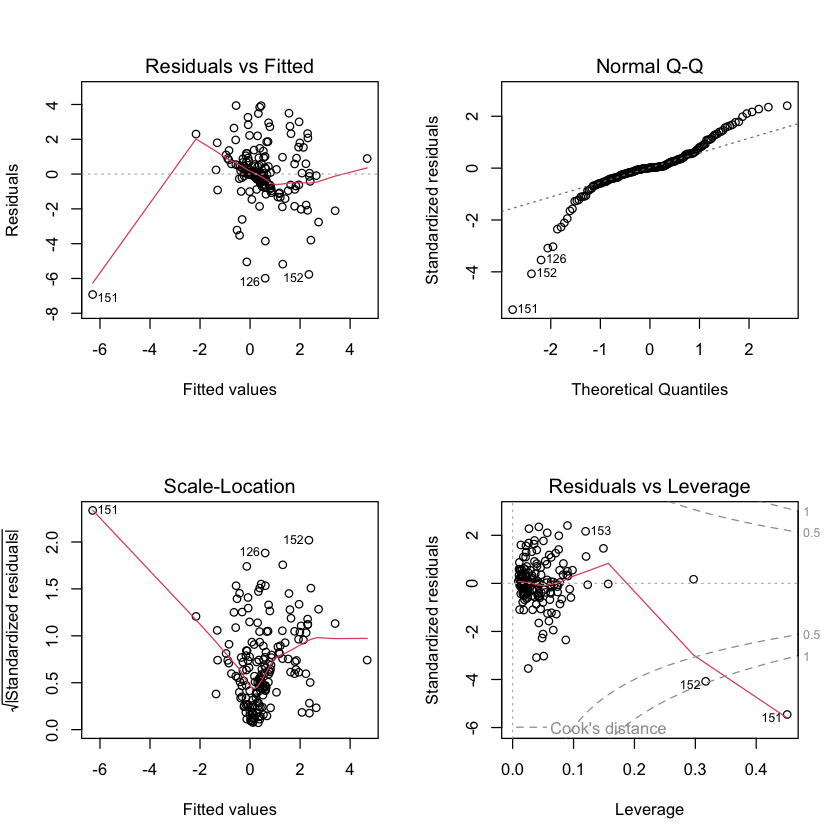

In [18]:
par(mfrow=c(2,2))
plot(model)

## Step 4: Save the ECM Model

Finally, we will save the ECM model to a file so that we can use it later.

In [4]:
# save the model to an RDS file
saveRDS(model, 'r-ecm-model.rds')